## Replacing Nan values with mean, predicting ARIMA process and Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\ee798q_ass\Open pit blasting.csv",index_col = 0, header = 0)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.columns = [ 'From', 'To', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'OZONE (µg/m3)', 'BENZENE (µg/m3)']

In [5]:
df['PM10 (µg/m3)'].fillna(df['PM10 (µg/m3)'][8643], inplace = True)
df['PM2.5 (µg/m3)'].fillna(df['PM2.5 (µg/m3)'][8643], inplace = True)
df['NO (µg/m3)'].fillna(df['NO (µg/m3)'][8643], inplace = True)
df['NO2 (µg/m3)'].fillna(df['NO2 (µg/m3)'][8643], inplace = True)
df['NOX (ppb)'].fillna(df['NOX (ppb)'][8643], inplace = True)
df['CO (mg/m3)'].fillna(df['CO (mg/m3)'][8643], inplace = True)
df['SO2 (µg/m3)'].fillna(df['SO2 (µg/m3)'][8643], inplace = True)
df['NH3 (µg/m3)'].fillna(df['NH3 (µg/m3)'][8643], inplace = True)
df['OZONE (µg/m3)'].fillna(df['OZONE (µg/m3)'][8643], inplace = True)
df['BENZENE (µg/m3)'].fillna(df['BENZENE (µg/m3)'][8643], inplace = True)

In [6]:
#df['Time Interval'] = df['From']+' -> '+df['To']
df = df[:-3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8640 entries, 1 to 8640
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From             8640 non-null   object 
 1   To               8640 non-null   object 
 2   PM10 (µg/m3)     8640 non-null   float64
 3   PM2.5 (µg/m3)    8640 non-null   float64
 4   NO (µg/m3)       8640 non-null   float64
 5   NO2 (µg/m3)      8640 non-null   float64
 6   NOX (ppb)        8640 non-null   float64
 7   CO (mg/m3)       8640 non-null   float64
 8   SO2 (µg/m3)      8640 non-null   float64
 9   NH3 (µg/m3)      8640 non-null   float64
 10  OZONE (µg/m3)    8640 non-null   float64
 11  BENZENE (µg/m3)  8640 non-null   float64
dtypes: float64(10), object(2)
memory usage: 877.5+ KB


In [7]:
df['From'] = pd.to_datetime(df['From'], format = '%Y-%m-%d %H:%M:%S')
df.drop(['To'], axis=1, inplace=True)

<IPython.core.display.Javascript object>


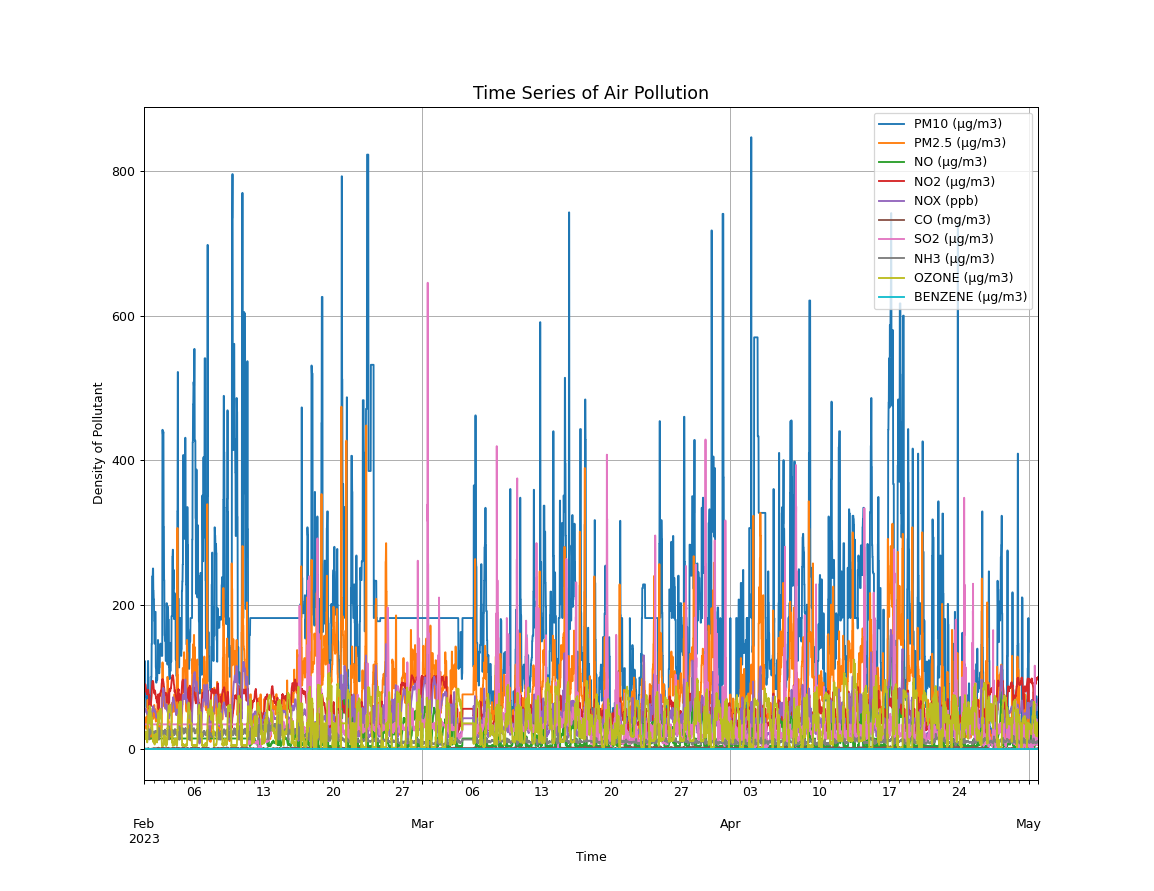

In [8]:
%matplotlib notebook
df.set_index(['From'], inplace = True)
df.plot()

plt.xlabel('Time')
plt.ylabel('Density of Pollutant')
plt.title('Time Series of Air Pollution', fontsize = 14)

#plt.tight_layout()
plt.grid()
plt.legend(loc=1)

In [39]:
PM10 = df['PM10 (µg/m3)']
PM25 = df['PM2.5 (µg/m3)']
NO = df['NO (µg/m3)']
NO2 = df['NO2 (µg/m3)']
NOX = df['NOX (ppb)']
CO = df['CO (mg/m3)']
SO2 = df['SO2 (µg/m3)']
NH3 = df['NH3 (µg/m3)']
OZONE = df['OZONE (µg/m3)']
BENZENE = df['BENZENE (µg/m3)']
# F = data['From']
# PM10

In [10]:
time_stamp = df.index[7990]
time_stamp

7991

In [11]:
msk = (df.index <= time_stamp)
df_train = df[msk].copy()
df_test = df[~msk].copy()

## Analysis for PM10

<IPython.core.display.Javascript object>


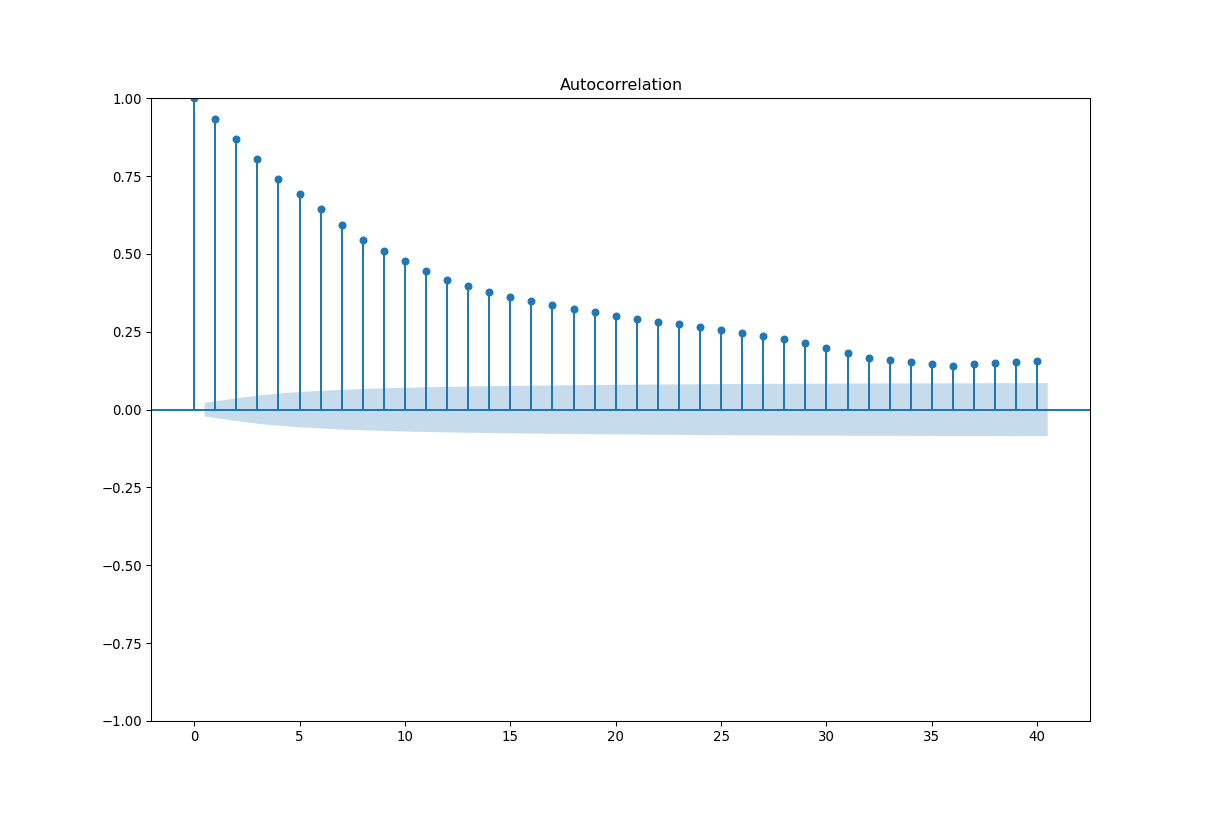

<IPython.core.display.Javascript object>


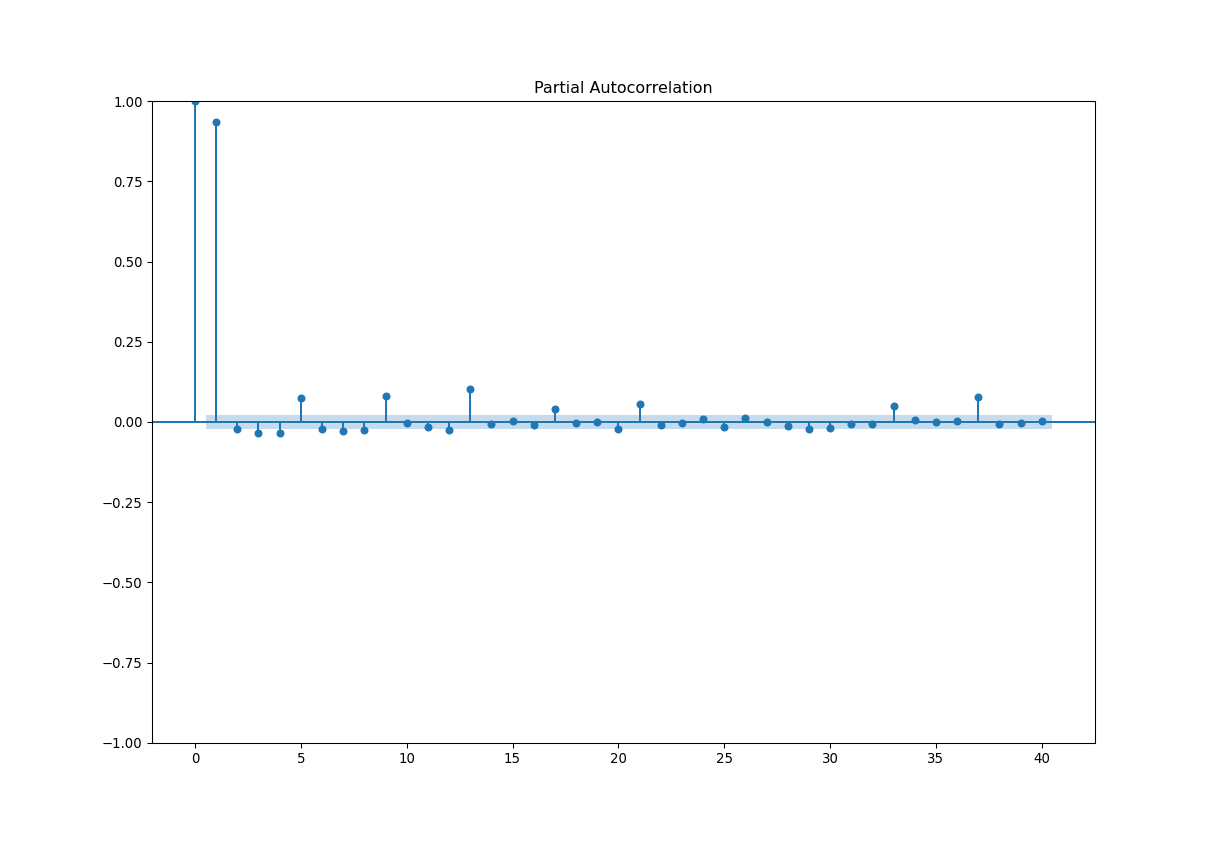

In [12]:
acf_plt = plot_acf(df_train['PM10 (µg/m3)'])
pacf_plt = plot_pacf(df_train['PM10 (µg/m3)'], method = 'ywm')

In [13]:
#adf_test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train['PM10 (µg/m3)'])
print(f'p-value is: {adf_test[1]}')

p-value is: 7.504030999071075e-16


p-value is very less so d=0.


Checking p-value by dropping NaN values of the data

In [17]:
data1 = pd.read_csv(r"C:\Users\HP\Downloads\ee798q_ass\Open pit blasting.csv",index_col = 0, header = 0)
df1 = pd.DataFrame(data1)
df1.columns = [ 'From', 'To', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (µg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'OZONE (µg/m3)', 'BENZENE (µg/m3)']

In [18]:
msk1 = (df1.index < len(df1)-650)
df_train1 = df1[msk1].copy()
df_test1 = df1[~msk1].copy()

In [19]:
adf_test1 = adfuller(df_train1['PM10 (µg/m3)'].dropna())
print(f'p-value is: {adf_test1[1]}')

p-value is: 2.998710291586918e-15


p-value is less in both so we consider replacing na with average value as it helps in plotting acf and pacf, 
and also gives us extra data points for better plotting

d=0

In [21]:
#!pip install pmdarima

In [14]:
from pmdarima.arima import auto_arima

def arimamodel(timeseriesarray):
    autoarima_model = auto_arima(timeseriesarray, 
                              start_p=0, 
                              start_q=0,
                              max_p=10, max_q=2,
                              d=0,
                              test="adf",
                              trace=True)
    return autoarima_model

In [15]:
#column-wise arima
arima_model = arimamodel(df_train['PM10 (µg/m3)'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=99381.512, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=82910.926, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=91832.300, Time=2.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=109264.504, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=82909.612, Time=0.95 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=82902.852, Time=0.77 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=82895.971, Time=1.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=82854.471, Time=1.94 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=82852.120, Time=2.49 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=82848.299, Time=3.49 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   : AIC=82845.377, Time=4.44 sec
 ARIMA(9,0,0)(0,0,0)[0] intercept   : AIC=82793.657, Time=4.06 sec
 ARIMA(10,0,0)(0,0,0)[0] intercept   : AIC=82795.627, Time=4.13 sec
 ARIMA(9,0,1)(0,0,0)[0] intercept   : AIC=82795.637, Time=10.69 sec
 ARIMA(8,0,1)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7991
Model:              SARIMAX(10, 0, 2)   Log Likelihood              -41368.220
Date:                Wed, 28 Jun 2023   AIC                          82764.440
Time:                        22:57:35   BIC                          82862.245
Sample:                             0   HQIC                         82797.919
                               - 7991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.3529      4.348      2.841      0.004       3.831      20.874
ar.L1          0.4878      0.169      2.893      0.004       0.157       0.818
ar.L2          0.8937      0.041     21.666      0.000       0.813       0.975
ar.L3         -0.4108      0.150     -2.748      0.006      -0.704      -0.118
ar.L4         -0.1195      0.034     -3.495      0.000      -0.187      -0.052
ar.L5          0.0526      0.039      1.364      0.173      -0.023       0.128
ar.L6          0.0972      0.025      3.966      0.000       0.049       0.145
ar.L7         -0.0445      0.037     -1.200      0.230      -0.117       0.028
ar.L8         -0.1000      0.024     -4.111      0.000      -0.148      -0.052
ar.L9          0.0354      0.033      1.075      0.282      -0.029       0.100
ar.L10         0.0426      0.016      2.671      0.008       0.011       0.074
ma.L1          0.4738      0.167      2.836      0.005       0.146       0.801
ma.L2         -0.4382      0.150     -2.917      0.004      -0.733      -0.144
sigma2      1836.2408      8.076    227.357      0.000    1820.411    1852.070
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1333707.73
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             1.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
test_auto = arima_model.predict(n_periods=len(df_test['PM10 (µg/m3)']))
df['PM10_forecast'] = [None]*len(df_train['PM10 (µg/m3)']) + list(test_auto)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<IPython.core.display.Javascript object>


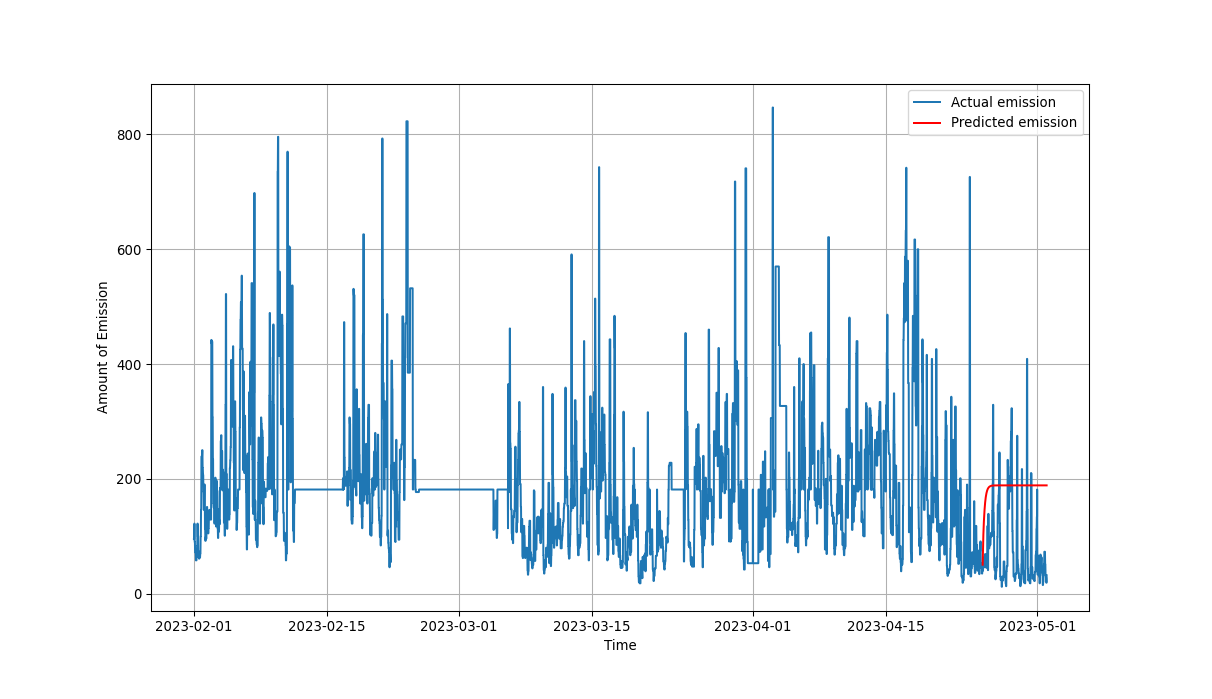

In [27]:
%matplotlib notebook
plt.plot(PM10, label = 'Actual emission')
plt.plot(df['PM10_forecast'], label = 'Predicted emission', color = 'r')
# df.plot()
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

This shows the original PM10 emission vs the predicted emission of PM10

In [29]:
# df.drop(['PM10_forecast'], axis=1, inplace=True)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(df_test['PM10 (µg/m3)'], test_auto)
mape = mean_absolute_percentage_error(df_test['PM10 (µg/m3)'], test_auto)
rmse = np.sqrt(mean_squared_error(df_test['PM10 (µg/m3)'], test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 119.83592688503717
mape - auto: 3.4470656097736976
rmse - auto: 129.70716791468263


Mean percentage error 3.4% which is very high so our model is not that accurate.

## Analysis for NO

<IPython.core.display.Javascript object>


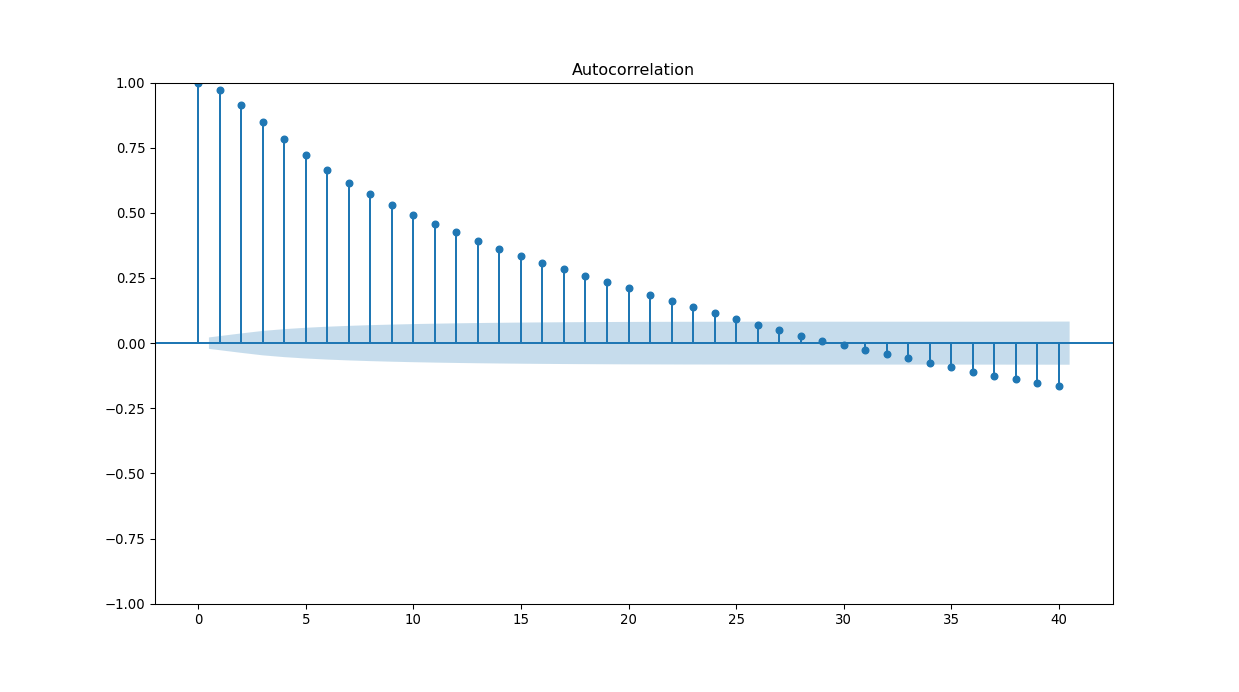

<IPython.core.display.Javascript object>


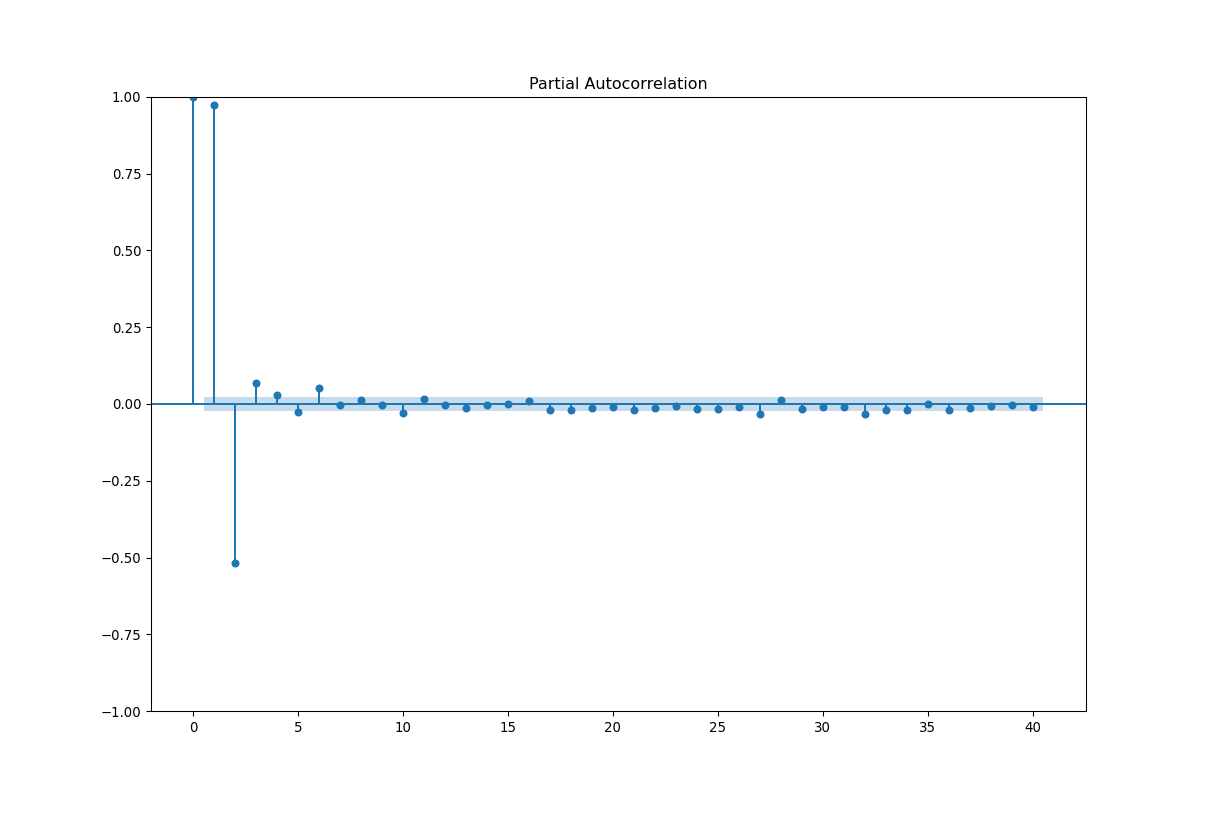

In [32]:
acf_plt_NO = plot_acf(df_train['NO (µg/m3)'])
pacf_plt_NO= plot_pacf(df_train['NO (µg/m3)'], method = 'ywm')

In [33]:
#adf_test
from statsmodels.tsa.stattools import adfuller
adf_test_NO = adfuller(df_train['NO (µg/m3)'])
print(f'p-value is: {adf_test_NO[1]}')

p-value is: 6.766853433545316e-27


In [18]:
#column-wise arima
arima_model_NO = arimamodel(df_train['NO (µg/m3)'])
arima_model_NO.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=68816.608, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45810.287, Time=0.62 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=59336.964, Time=1.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=73032.889, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=43334.275, Time=0.74 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=43299.265, Time=0.99 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=43294.469, Time=1.75 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=43291.052, Time=1.80 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=43271.640, Time=2.55 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=43273.610, Time=3.05 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=43273.577, Time=14.38 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=43281.143, Time=11.65 sec
 ARIMA(7,0,1)(0,0,0)[0] intercept   : AIC=43275.482, Time=9.03 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=43377.725, Time=0.72 sec

Best model:  ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7991
Model:               SARIMAX(6, 0, 0)   Log Likelihood              -21627.820
Date:                Wed, 28 Jun 2023   AIC                          43271.640
Time:                        22:59:31   BIC                          43327.528
Sample:                             0   HQIC                         43290.771
                               - 7991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5677      0.072      7.846      0.000       0.426       0.710
ar.L1          1.5084      0.004    422.475      0.000       1.501       1.515
ar.L2         -0.6014      0.006    -99.884      0.000      -0.613      -0.590
ar.L3          0.0080      0.008      1.055      0.292      -0.007       0.023
ar.L4          0.0993      0.009     11.182      0.000       0.082       0.117
ar.L5         -0.1040      0.012     -8.500      0.000      -0.128      -0.080
ar.L6          0.0517      0.008      6.323      0.000       0.036       0.068
sigma2        13.1274      0.045    291.666      0.000      13.039      13.216
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           5101276.55
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                       126.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
test_auto_NO = arima_model_NO.predict(n_periods=len(df_test['NO (µg/m3)']))
df['NO_forecast'] = [None]*len(df_train['NO (µg/m3)']) + list(test_auto_NO)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<IPython.core.display.Javascript object>


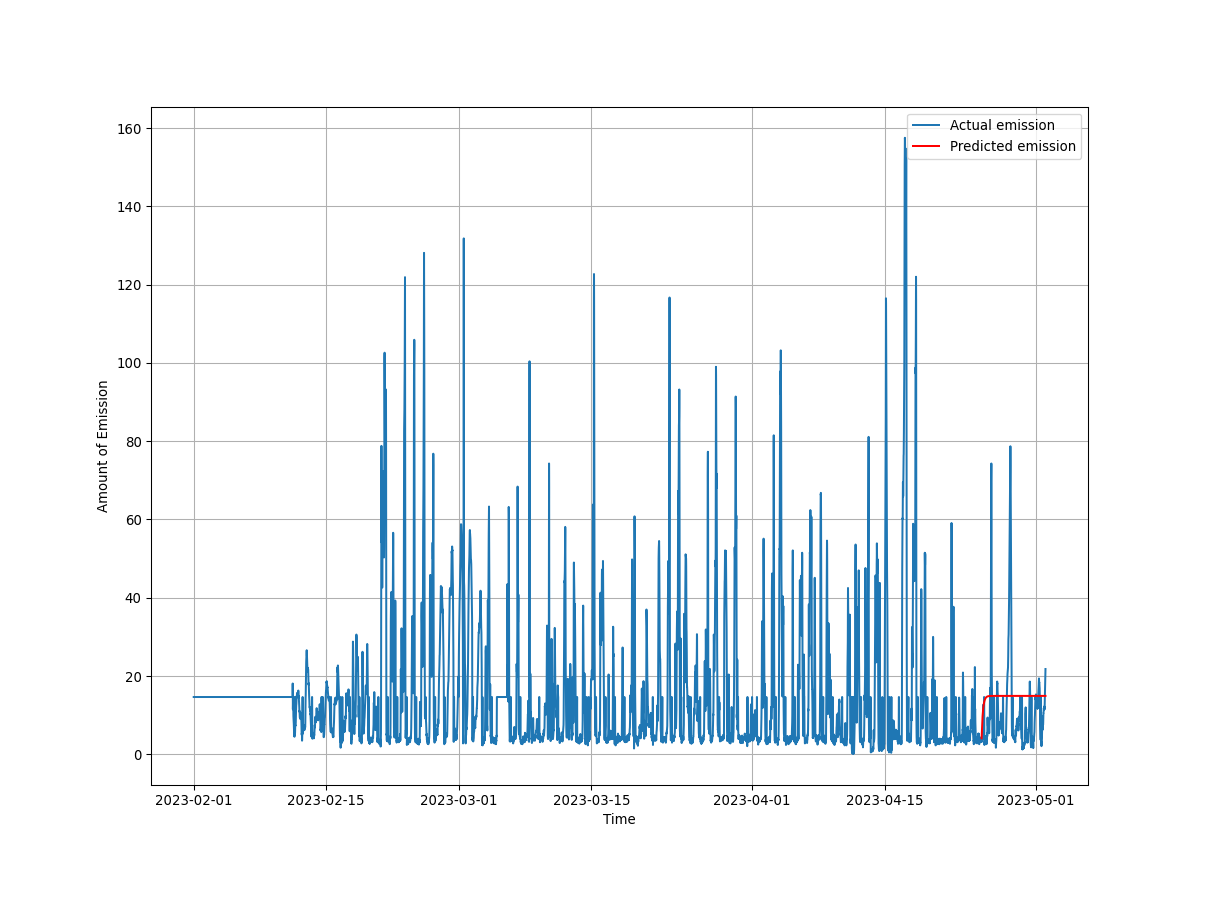

In [36]:
%matplotlib notebook
plt.plot(NO, label = 'Actual emission')
plt.plot(df['NO_forecast'], label = 'Predicted emission', color = 'r')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

In [58]:
# df.drop(['NO_forecast'], axis=1, inplace=True)

In [37]:
mae = mean_absolute_error(df_test['NO (µg/m3)'], test_auto_NO)
mape = mean_absolute_percentage_error(df_test['NO (µg/m3)'], test_auto_NO)
rmse = np.sqrt(mean_squared_error(df_test['NO (µg/m3)'], test_auto_NO))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 9.30882792846005
mape - auto: 1.698805678792523
rmse - auto: 13.281853545990794


Mape is 1.6% which is low so our model can be considered accurate but looking at the graph the accuracy is not that high.(as there is much deviation from the actual data)

## Analysis for NOX

<IPython.core.display.Javascript object>


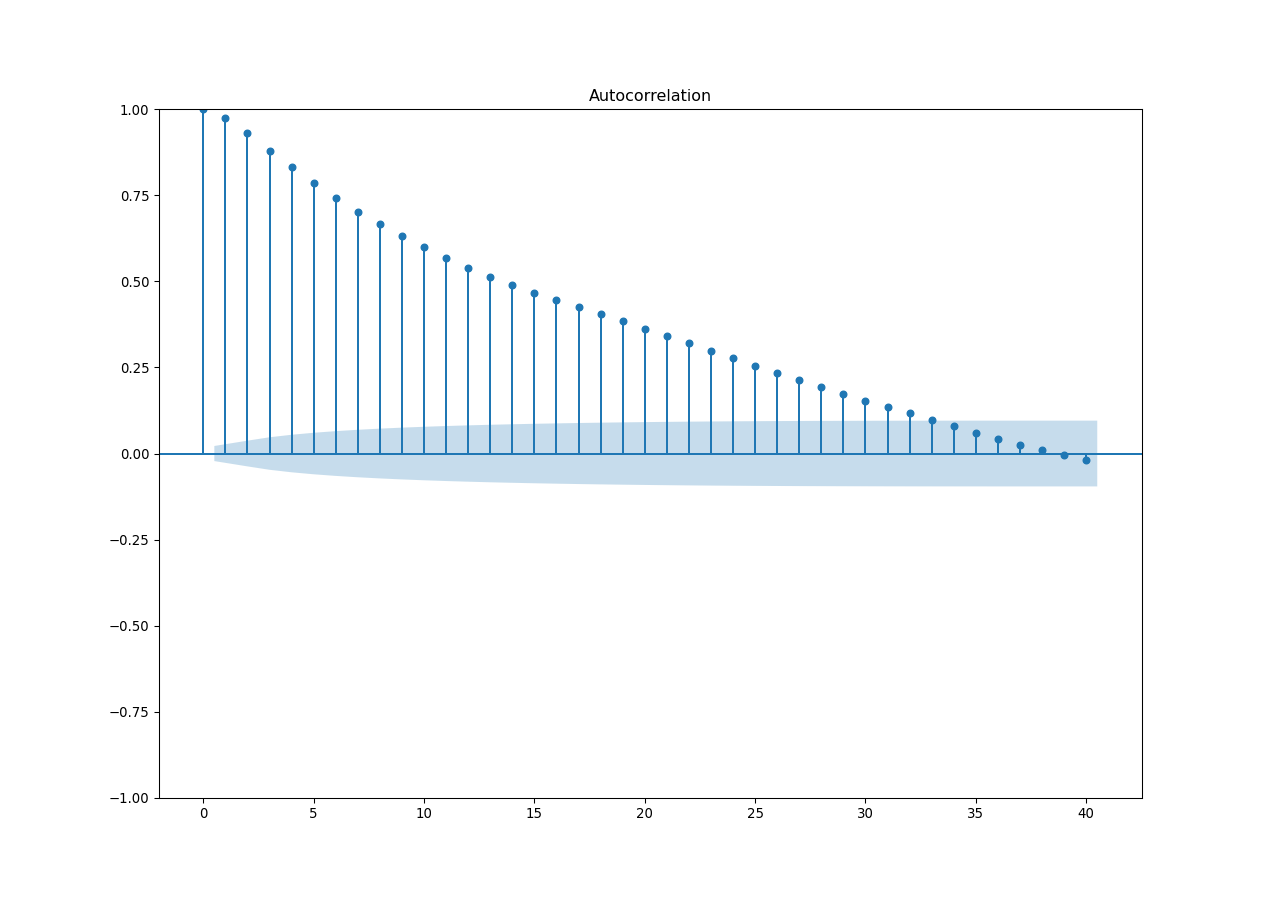

<IPython.core.display.Javascript object>


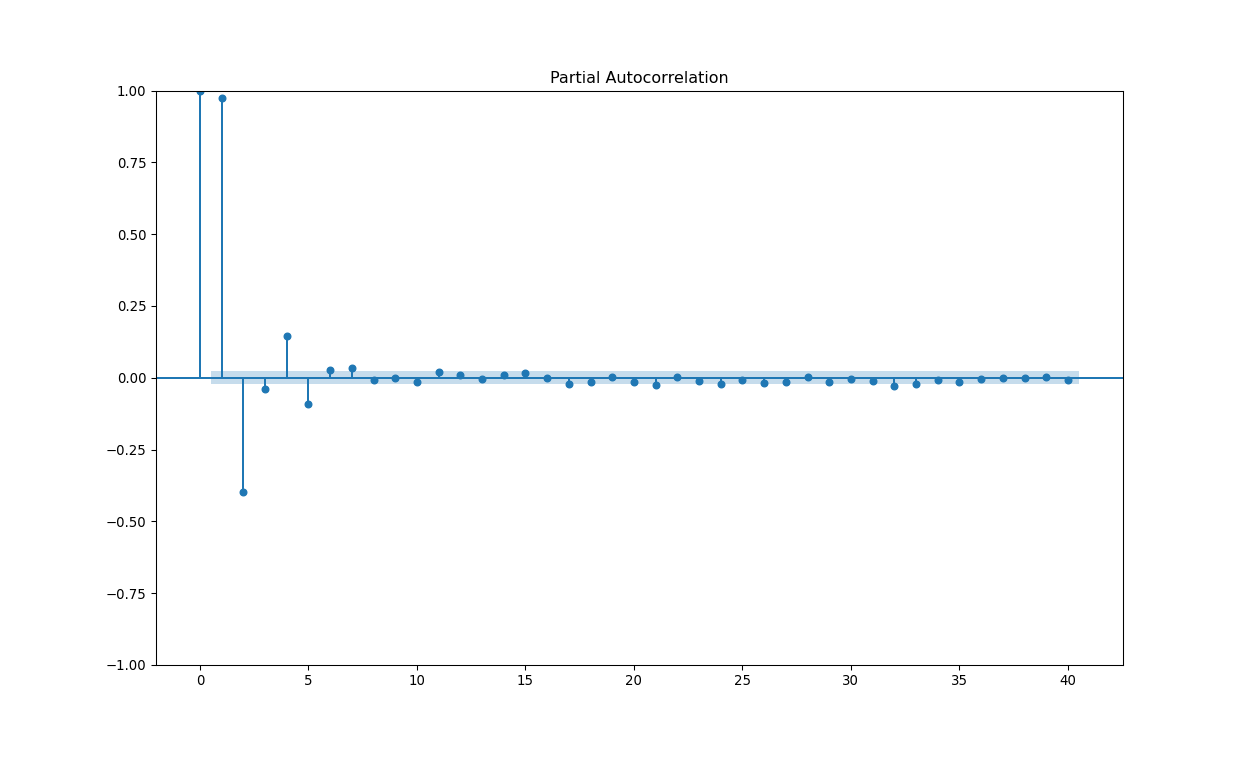

In [38]:
acf_plt_NOX = plot_acf(df_train['NOX (ppb)'])
pacf_plt_NOX= plot_pacf(df_train['NOX (ppb)'], method = 'ywm')

In [20]:
#adf_test
from statsmodels.tsa.stattools import adfuller
adf_test_NOX = adfuller(df_train['NOX (ppb)'])
print(f'p-value is: {adf_test_NOX[1]}')

p-value is: 1.0044882134200865e-24


In [21]:
arima_model_NOX= arimamodel(df_train['NOX (ppb)'])
arima_model_NOX.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=72184.422, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=48157.882, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63091.580, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84446.877, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=46763.609, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=46753.407, Time=1.43 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=46583.689, Time=2.14 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=46517.679, Time=2.56 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=46514.050, Time=3.62 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=46505.721, Time=5.26 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   : AIC=46507.367, Time=5.66 sec
 ARIMA(7,0,1)(0,0,0)[0] intercept   : AIC=46507.206, Time=11.35 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=46510.705, Time=21.57 sec
 ARIMA(8,0,1)(0,0,0)[0] intercept   : AIC=46509.128, Time=11.47 sec
 ARIMA(7,0,0)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7991
Model:               SARIMAX(7, 0, 0)   Log Likelihood              -23243.860
Date:                Wed, 28 Jun 2023   AIC                          46505.721
Time:                        23:01:34   BIC                          46568.595
Sample:                             0   HQIC                         46527.243
                               - 7991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3444      0.125     10.785      0.000       1.100       1.589
ar.L1          1.3703      0.005    299.321      0.000       1.361       1.379
ar.L2         -0.3207      0.007    -44.746      0.000      -0.335      -0.307
ar.L3         -0.2662      0.007    -38.441      0.000      -0.280      -0.253
ar.L4          0.2882      0.008     35.351      0.000       0.272       0.304
ar.L5         -0.1167      0.013     -9.281      0.000      -0.141      -0.092
ar.L6         -0.0228      0.015     -1.493      0.135      -0.053       0.007
ar.L7          0.0360      0.009      3.824      0.000       0.018       0.054
sigma2        19.6709      0.079    247.938      0.000      19.515      19.826
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1067601.43
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
test_auto_NOX = arima_model_NOX.predict(n_periods=len(df_test['NOX (ppb)']))
df['NOX_forecast'] = [None]*len(df_train['NOX (ppb)']) + list(test_auto_NOX)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<IPython.core.display.Javascript object>


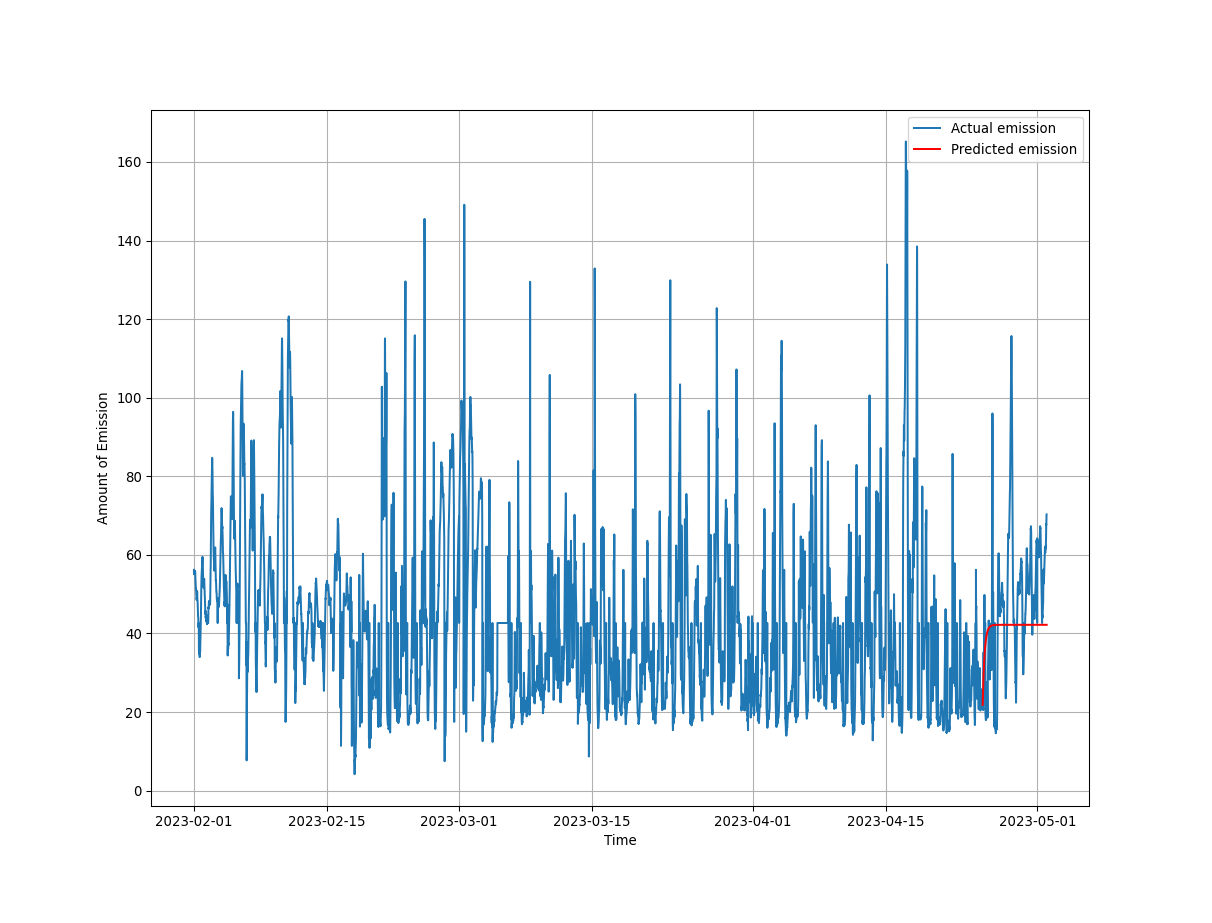

In [42]:
%matplotlib notebook
plt.plot(NOX, label = 'Actual emission')
plt.plot(df['NOX_forecast'], label = 'Predicted emission', color = 'r')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

In [43]:
# df.drop(['NOX_forecast'], axis=1, inplace=True)

In [44]:
mae = mean_absolute_error(df_test['NOX (ppb)'], test_auto_NOX)
mape = mean_absolute_percentage_error(df_test['NOX (ppb)'], test_auto_NOX)
rmse = np.sqrt(mean_squared_error(df_test['NOX (ppb)'], test_auto_NOX))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 13.738165021418675
mape - auto: 0.3266647189764088
rmse - auto: 18.27902798753299


Mape is 0.3% so it can be considered as a fairly accurate model.(also looking at the forecast comparision with original data)

## Analysis for SO2

<IPython.core.display.Javascript object>


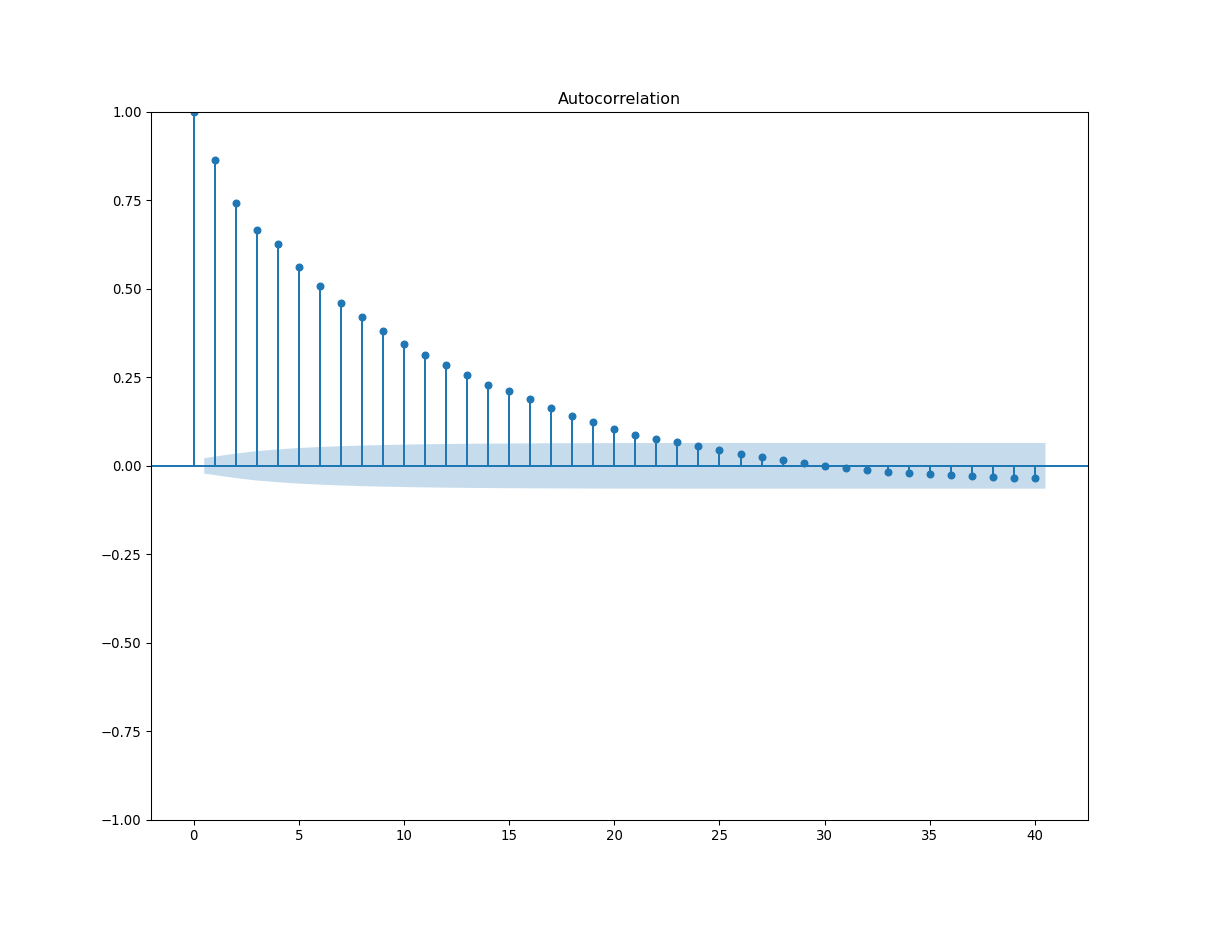

<IPython.core.display.Javascript object>


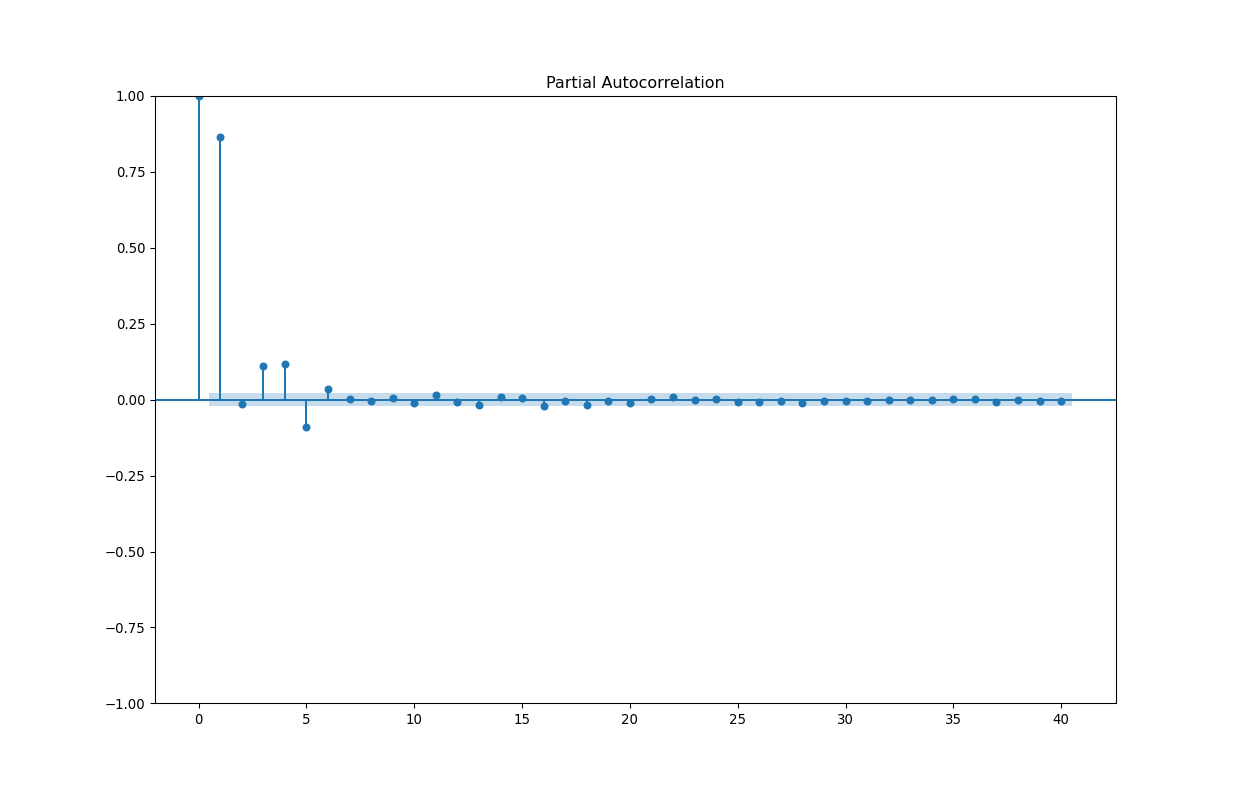

In [45]:
acf_plt_SO2 = plot_acf(df_train['SO2 (µg/m3)'])
pacf_plt_SO2= plot_pacf(df_train['SO2 (µg/m3)'], method = 'ywm')

In [23]:
#adf_test
adf_test_SO2 = adfuller(df_train['SO2 (µg/m3)'])
print(f'p-value is: {adf_test_SO2[1]}')

p-value is: 2.91997043062541e-30


In [24]:
#column-wise arima
arima_model_SO2 = arimamodel(df_train['SO2 (µg/m3)'])
arima_model_SO2.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=80205.280, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=69280.338, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=74405.183, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85461.886, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=69280.950, Time=0.84 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=69280.479, Time=2.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=69276.155, Time=5.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=69138.056, Time=6.91 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=69182.115, Time=0.92 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=69008.884, Time=10.36 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=69070.596, Time=1.11 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=69001.700, Time=11.65 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=69008.077, Time=1.87 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=69002.151, Time=10.07 sec
 ARIMA(5,0,2)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7991
Model:               SARIMAX(4, 0, 2)   Log Likelihood              -34491.872
Date:                Wed, 28 Jun 2023   AIC                          68999.743
Time:                        23:04:01   BIC                          69055.632
Sample:                             0   HQIC                         69018.874
                               - 7991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.2711      0.770      9.449      0.000       5.763       8.779
ar.L1          0.2754      0.021     13.416      0.000       0.235       0.316
ar.L2          0.2312      0.025      9.256      0.000       0.182       0.280
ar.L3          0.1055      0.021      5.091      0.000       0.065       0.146
ar.L4          0.1815      0.004     48.345      0.000       0.174       0.189
ma.L1          0.6014      0.022     27.877      0.000       0.559       0.644
ma.L2          0.1924      0.024      7.989      0.000       0.145       0.240
sigma2       328.5534      1.097    299.510      0.000     326.403     330.703
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3115804.76
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                             4.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        99.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
test_auto_SO2 = arima_model_SO2.predict(n_periods=len(df_test['SO2 (µg/m3)']))
df['SO2_forecast'] = [None]*len(df_train['SO2 (µg/m3)']) + list(test_auto_SO2)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<IPython.core.display.Javascript object>


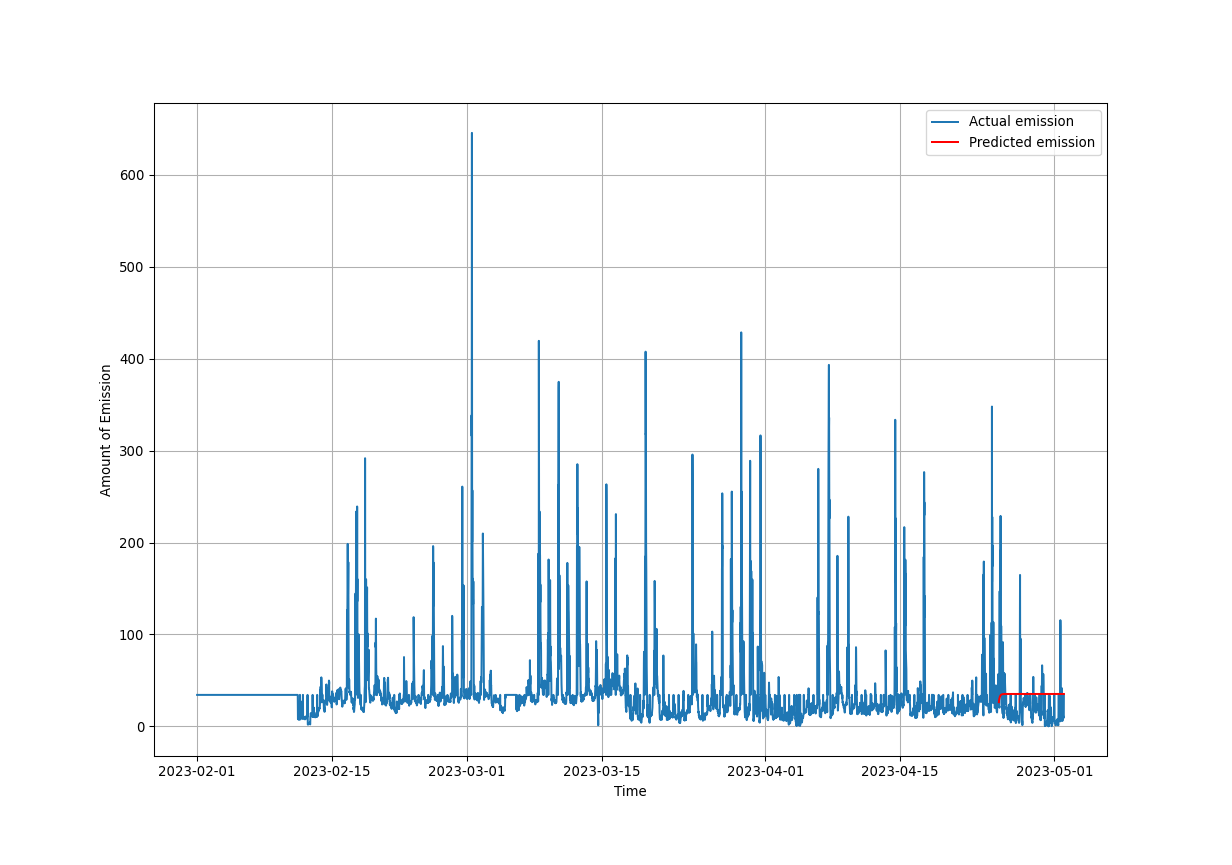

In [49]:
%matplotlib notebook
plt.plot(SO2, label = 'Actual emission')
plt.plot(df['SO2_forecast'], label = 'Predicted emission', color = 'r')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

In [50]:
# df.drop(['SO2_forecast'], axis=1, inplace=True)

In [51]:
mae = mean_absolute_error(df_test['SO2 (µg/m3)'], test_auto_SO2)
mape = mean_absolute_percentage_error(df_test['SO2 (µg/m3)'], test_auto_SO2)
rmse = np.sqrt(mean_squared_error(df_test['SO2 (µg/m3)'], test_auto_SO2))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 21.960095552663297
mape - auto: 4.324195882953279
rmse - auto: 28.103940688130653


Mape is 4.3% which is very high so our model is not accurate.

## Analysis for OZONE 

<IPython.core.display.Javascript object>


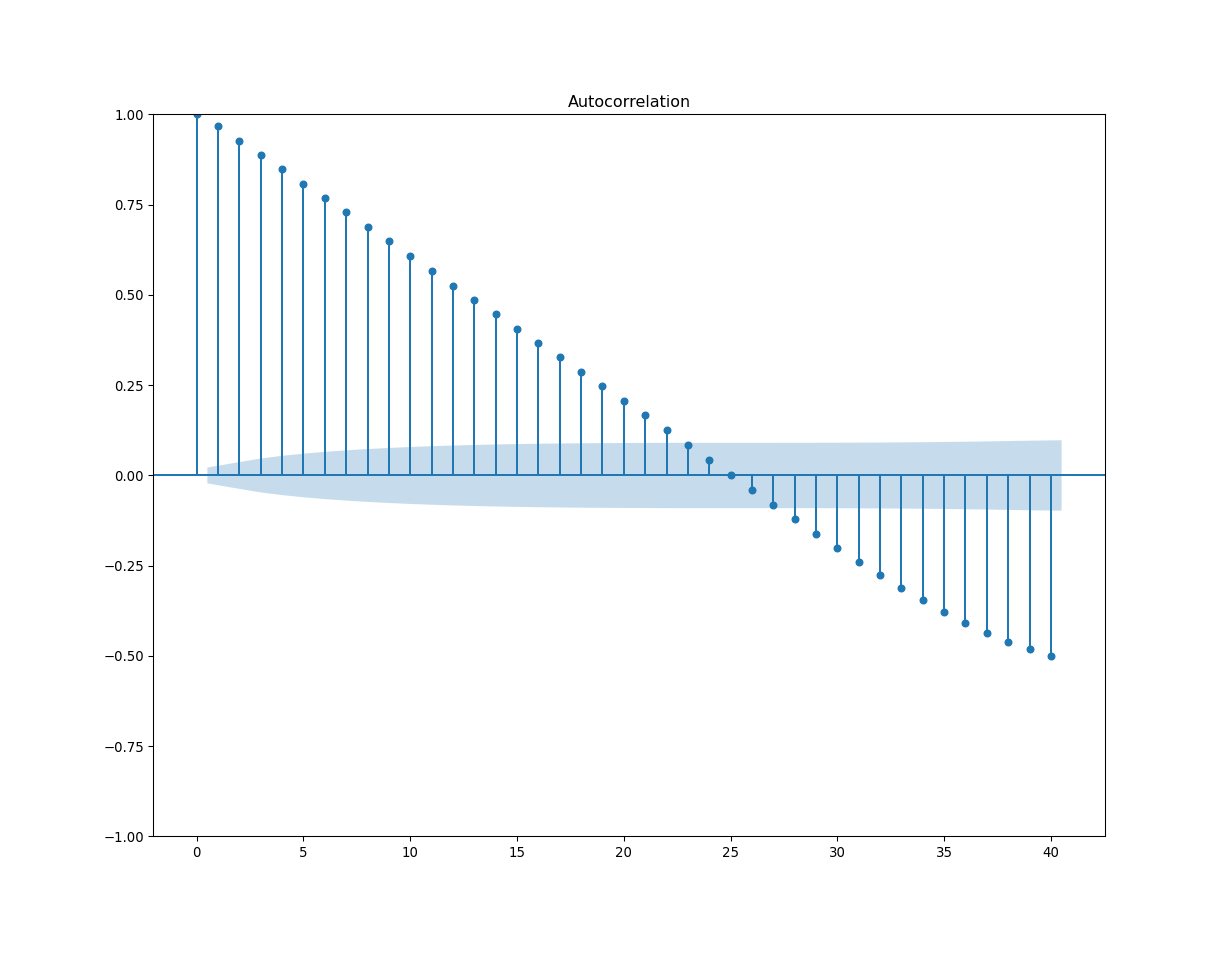

<IPython.core.display.Javascript object>


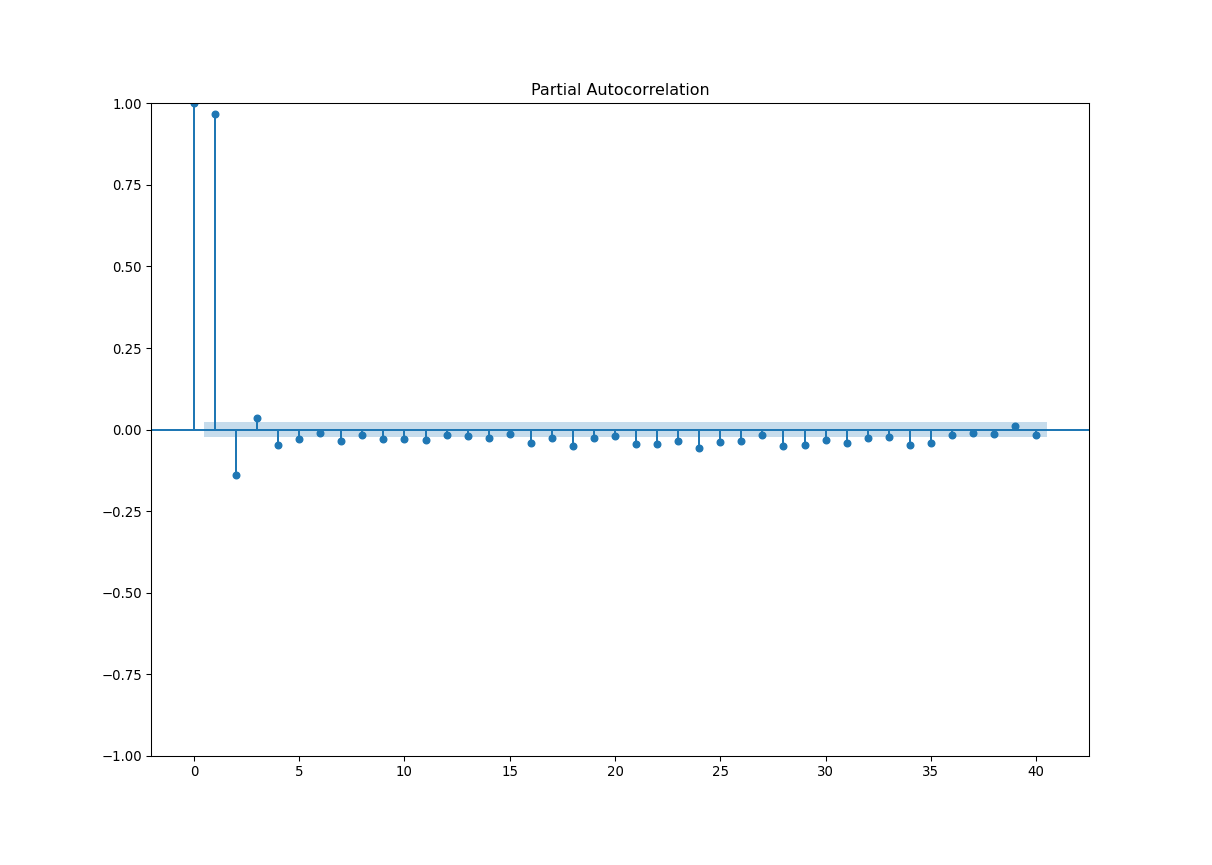

In [52]:
acf_plt_OZ = plot_acf(df_train['OZONE (µg/m3)'])
pacf_plt_OZ= plot_pacf(df_train['OZONE (µg/m3)'], method = 'ywm')

In [53]:
#adf_test
adf_test_OZ = adfuller(df_train['OZONE (µg/m3)'])
print(f'p-value is: {adf_test_OZ[1]}')

p-value is: 0.0


In [54]:
#perfectly stationary

In [25]:
arima_model_OZ = arimamodel(df_train['OZONE (µg/m3)'])
arima_model_OZ.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=75043.594, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=53172.411, Time=0.64 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=66317.142, Time=1.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=83162.492, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=53014.523, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=53006.346, Time=2.03 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=52990.107, Time=3.03 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=52986.066, Time=3.43 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=52986.893, Time=4.00 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52988.917, Time=6.37 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=52824.094, Time=15.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=53001.495, Time=5.84 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=52997.458, Time=10.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=53001.722, Time=12.38 sec
 ARIMA(5,0,2)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7991
Model:               SARIMAX(4, 0, 1)   Log Likelihood              -26405.047
Date:                Wed, 28 Jun 2023   AIC                          52824.094
Time:                        23:05:43   BIC                          52872.997
Sample:                             0   HQIC                         52840.834
                               - 7991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1360      0.013     10.234      0.000       0.110       0.162
ar.L1          2.0504      0.009    231.128      0.000       2.033       2.068
ar.L2         -1.2331      0.014    -87.322      0.000      -1.261      -1.205
ar.L3          0.2598      0.012     22.279      0.000       0.237       0.283
ar.L4         -0.0810      0.006    -13.896      0.000      -0.092      -0.070
ma.L1         -0.9620      0.006   -173.152      0.000      -0.973      -0.951
sigma2        43.3710      0.317    137.026      0.000      42.751      43.991
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             58158.25
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
test_auto_OZ = arima_model_OZ.predict(n_periods=len(df_test['OZONE (µg/m3)']))
df['OZONE_forecast'] = [None]*len(df_train['OZONE (µg/m3)']) + list(test_auto_OZ)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<IPython.core.display.Javascript object>


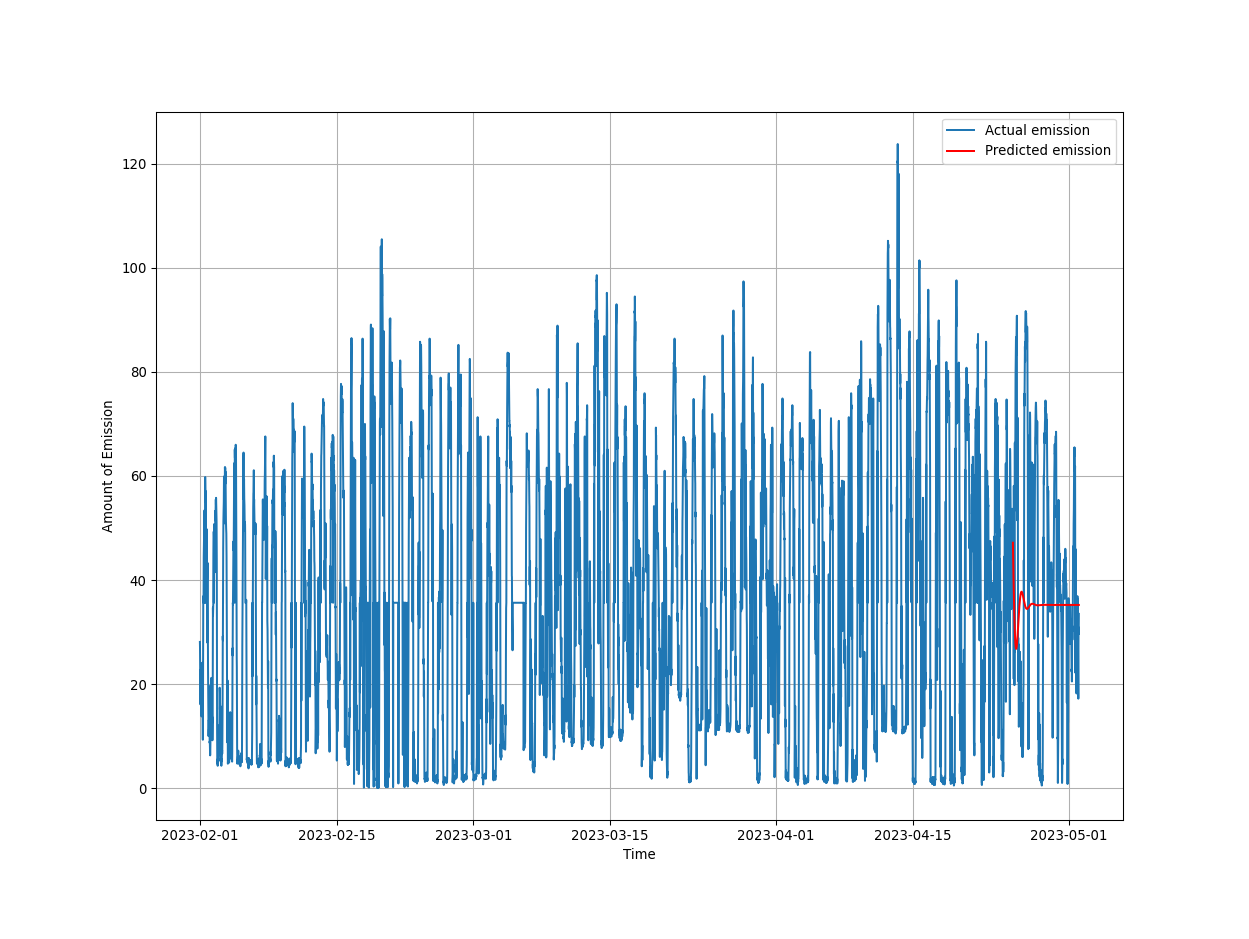

In [58]:
%matplotlib notebook
plt.plot(OZONE, label = 'Actual emission')
plt.plot(df['OZONE_forecast'], label = 'Predicted emission', color = 'r')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

In [59]:
# df.drop(['OZONE_forecast'], axis=1, inplace=True)

In [60]:
mae = mean_absolute_error(df_test['OZONE (µg/m3)'], test_auto_OZ)
mape = mean_absolute_percentage_error(df_test['OZONE (µg/m3)'], test_auto_OZ)
rmse = np.sqrt(mean_squared_error(df_test['OZONE (µg/m3)'], test_auto_OZ))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 19.75426100295783
mape - auto: 1.8683769963191899
rmse - auto: 24.74130298087912


Mape is 1.6% which is low so our model can be considered accurate but looking at the graph the accuracy is not that high.(as there is much deviation from the actual data)

## Comparing ARIMA with Interpolation

(Interpolation is performed after this, we interpolated the data , converted it into a csv file and came back for comparision)

In [37]:
data_int = pd.read_csv(r"C:\Users\HP\Downloads\ee798q_ass\Interpolated Df.csv",index_col = 0, header = 0)
df_int = pd.DataFrame(data_int)
df_int.index = pd.to_datetime(df_int.index)

In [47]:
data_actual = pd.read_csv(r"C:\Users\HP\Downloads\ee798q_ass\Open pit blasting.csv",index_col = 0, header = 0)
df_actual = pd.DataFrame(data_actual)
df_actual.columns = [ 'From', 'To', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'OZONE (µg/m3)', 'BENZENE (µg/m3)']
df_actual = df_actual[:-3]

## For PM10

<IPython.core.display.Javascript object>


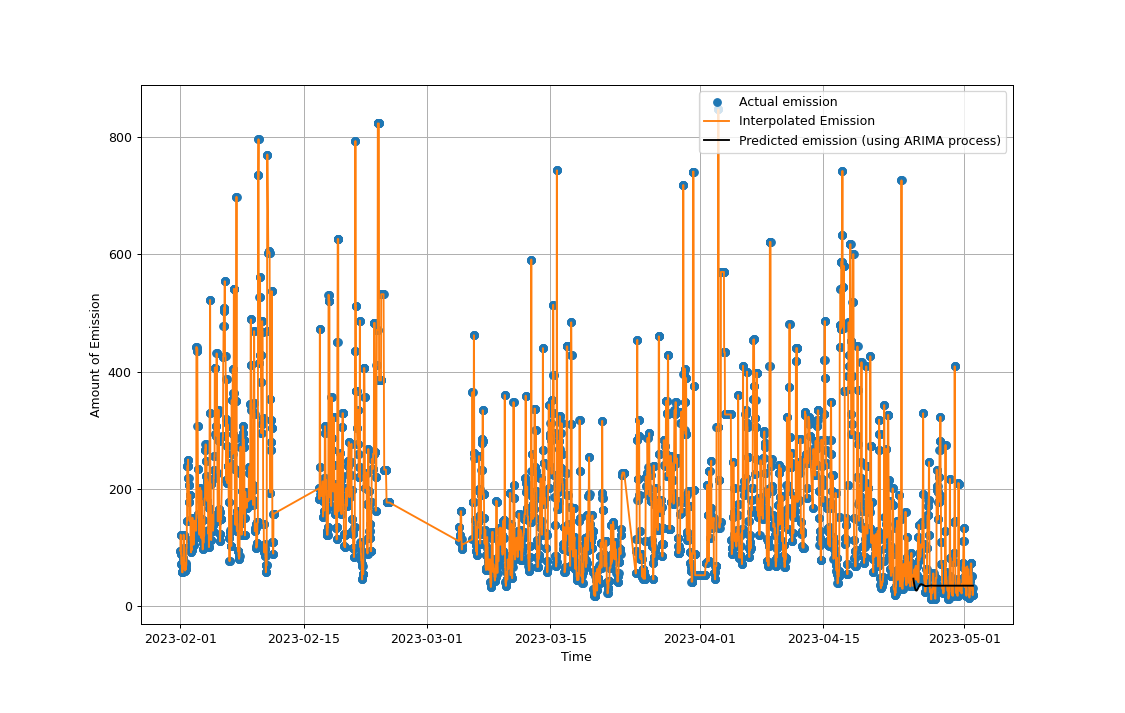

In [48]:
%matplotlib notebook
plt.plot(df_int.index, df_actual['PM10 (µg/m3)'], 'o', label = 'Actual emission')
plt.plot(df_int.index, df_int['PM10 (µg/m3)'], label = 'Interpolated Emission')
plt.plot(df_int.index, df['OZONE_forecast'], label = 'Predicted emission (using ARIMA process)', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

## For NO

<IPython.core.display.Javascript object>


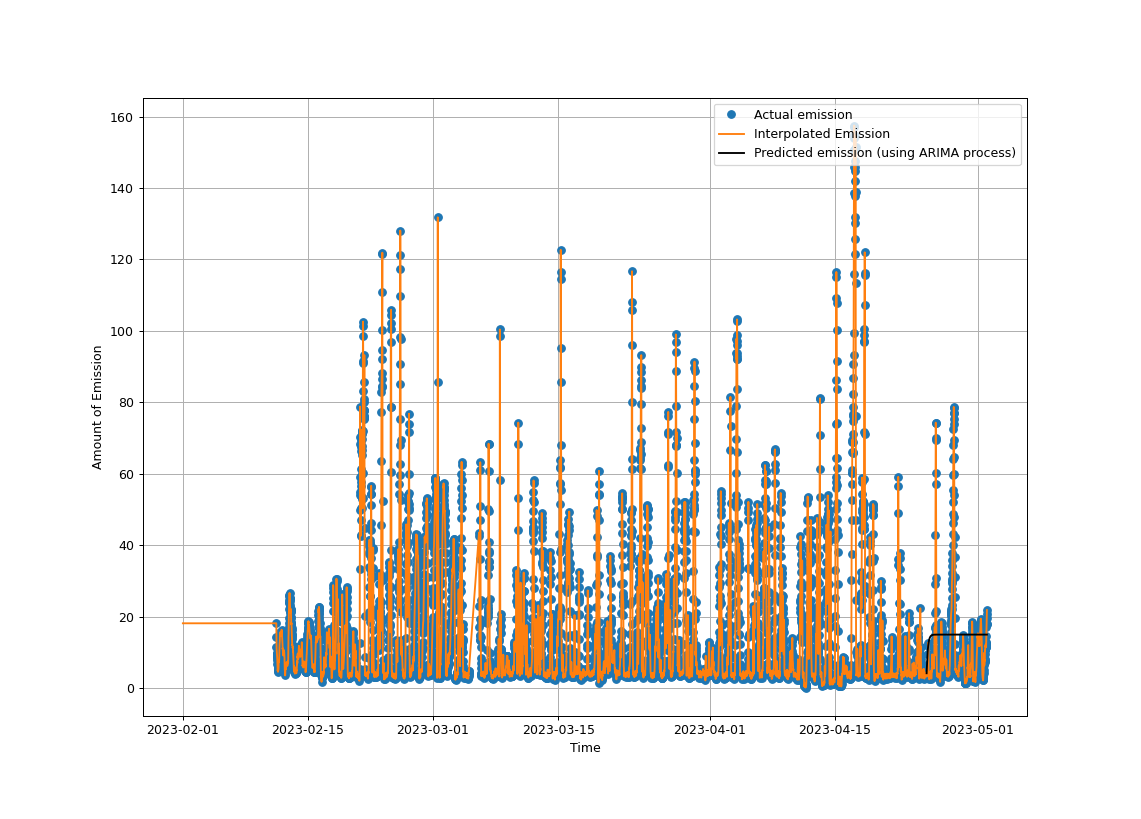

In [49]:
%matplotlib notebook
plt.plot(df_int.index, df_actual['NO (µg/m3)'], 'o', label = 'Actual emission')
plt.plot(df_int.index, df_int['NO (µg/m3)'], label = 'Interpolated Emission')
plt.plot(df_int.index, df['NO_forecast'], label = 'Predicted emission (using ARIMA process)', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

## For NOX

<IPython.core.display.Javascript object>


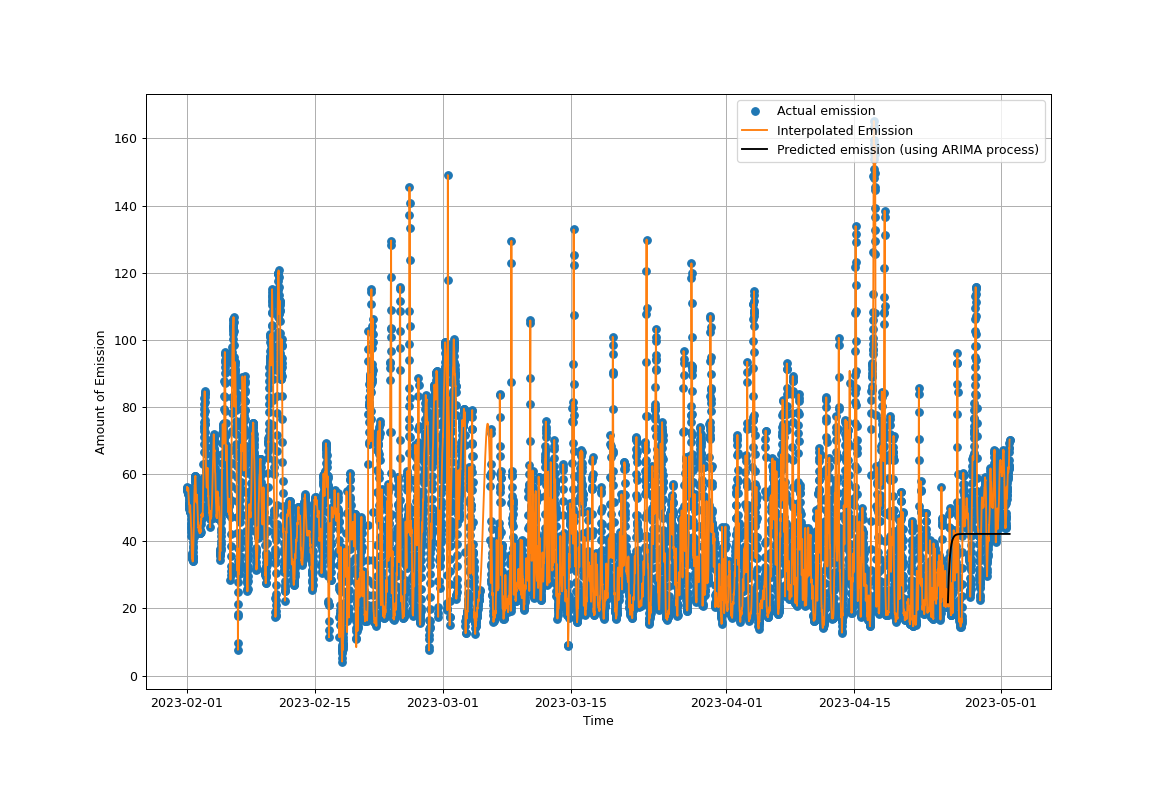

In [50]:
%matplotlib notebook
plt.plot(df_int.index, df_actual['NOX (ppb)'], 'o', label = 'Actual emission')
plt.plot(df_int.index, df_int['NOX (ppb)'], label = 'Interpolated Emission')
plt.plot(df_int.index, df['NOX_forecast'], label = 'Predicted emission (using ARIMA process)', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

## For SO2

<IPython.core.display.Javascript object>


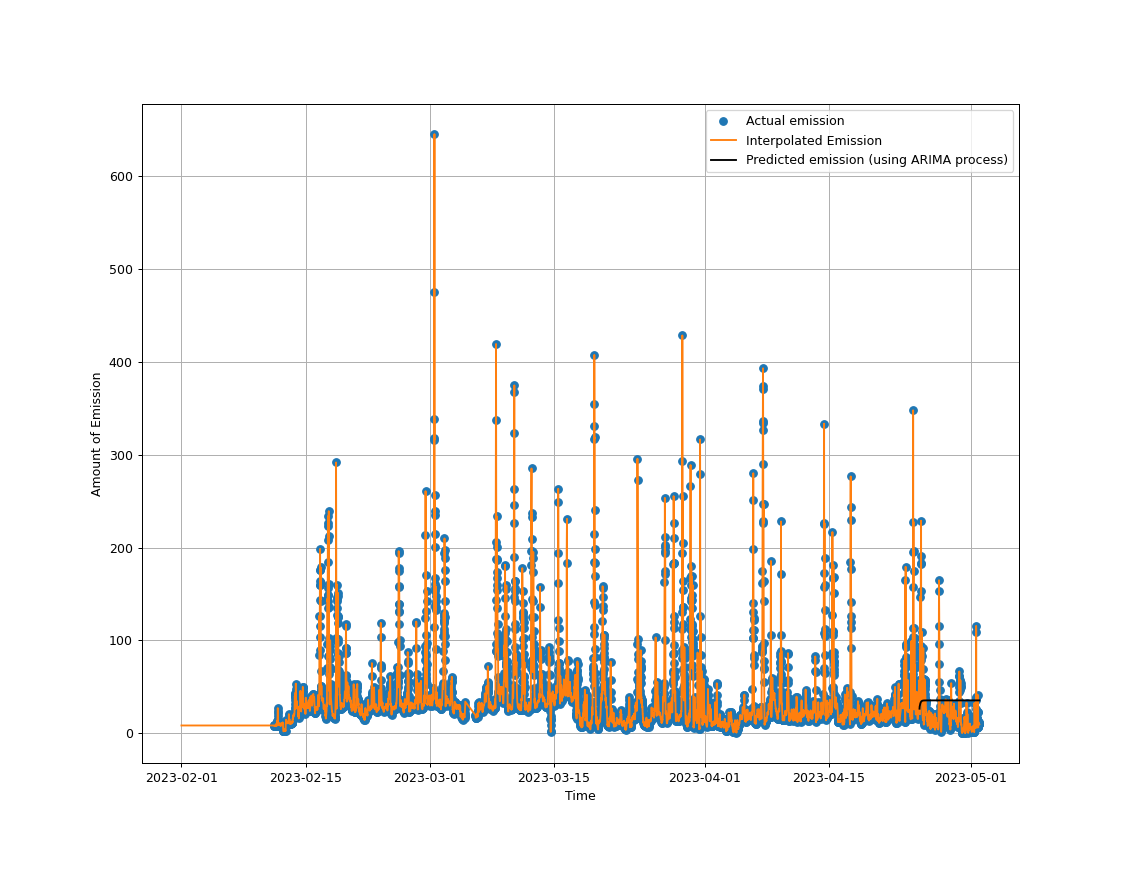

In [51]:
%matplotlib notebook
plt.plot(df_int.index, df_actual['SO2 (µg/m3)'], 'o', label = 'Actual emission')
plt.plot(df_int.index, df_int['SO2 (µg/m3)'], label = 'Interpolated Emission')
plt.plot(df_int.index, df['SO2_forecast'], label = 'Predicted emission (using ARIMA process)', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

## For Ozone

<IPython.core.display.Javascript object>


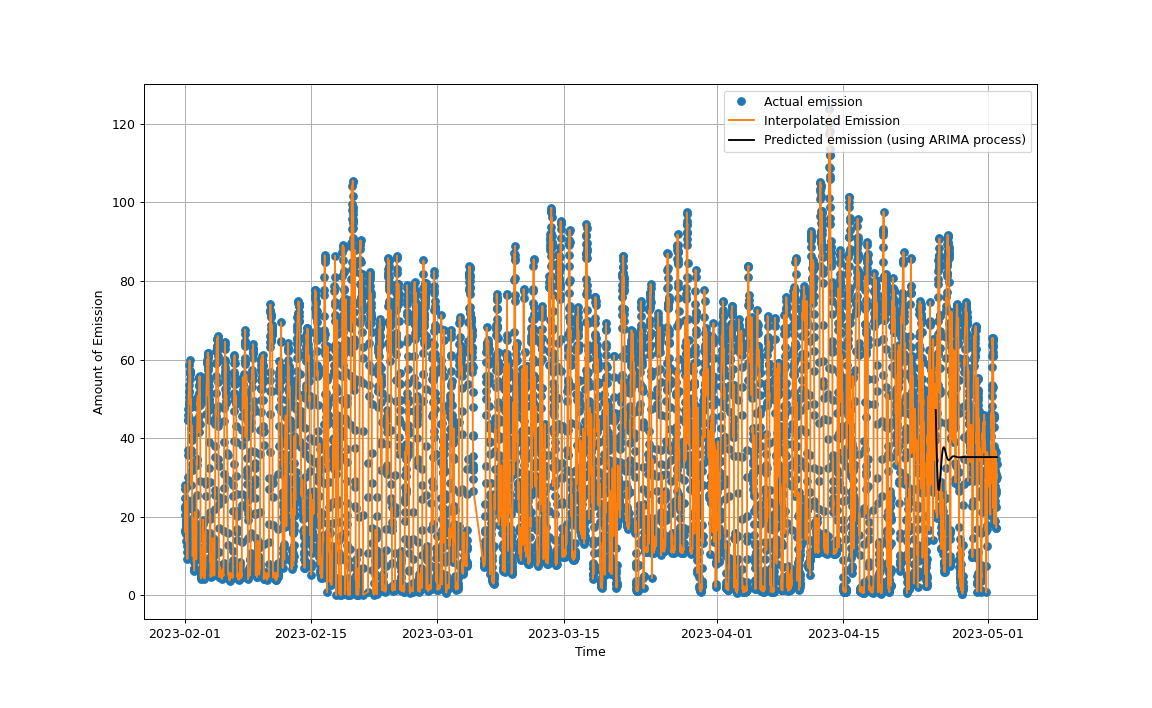

In [52]:
%matplotlib notebook
plt.plot(df_int.index, df_actual['OZONE (µg/m3)'], 'o', label = 'Actual emission')
plt.plot(df_int.index, df_int['OZONE (µg/m3)'], label = 'Interpolated Emission')
plt.plot(df_int.index, df['OZONE_forecast'], label = 'Predicted emission (using ARIMA process)', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount of Emission')
plt.grid()
plt.legend(loc=1)
plt.show()

By looking at the above comparisons, we come to the conclusion that interpolation is better than ARIMA process as it is much closer the actual data.